## **Network Motif Analysis in E. coli Regulatory Network**

### **Overview**

This notebook performs the following tasks:

1. **Data Loading and Preprocessing:** Imports the motif detection results from a CSV file.
2. **Exploratory Data Analysis (EDA):** Provides an overview of the motif distribution.
3. **Statistical Analysis:** Identifies significantly over- or under-represented motifs.
4. **Visualization:** Generates plots to visualize motif significance and distribution.
5. **Interpretation:** Discusses the biological implications of the findings.

Data loaded successfully.

First 5 rows of the dataset:


,motif,real,mean_rand,std_rand,z_score,p_value,p_value_corrected,significant
0,0->1:-;0->2:+-,108,219.6,22.808770,-4.892855,1.0,1.0,False
1,0->1:-;0->2:-,3994,1619.6,253.370559,9.371255,0.0,0.0,True
2,0->1:+;0->2:-,720,2096.4,185.145996,-7.434133,1.0,1.0,False
3,0->1:+-;0->2:-,152,216.4,42.059957,-1.531148,1.0,1.0,False
4,0->1:+;0->2:+,3838,2843.4,161.899475,6.143318,0.0,0.0,True



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   motif              16 non-null     object 
 1   real               16 non-null     int64  
 2   mean_rand          16 non-null     float64
 3   std_rand           16 non-null     float64
 4   z_score            16 non-null     float64
 5   p_value            16 non-null     float64
 6   p_value_corrected  16 non-null     float64
 7   significant        16 non-null     bool   
dtypes: bool(1), float64(5), int64(1), object(1)
memory usage: 1.0+ KB

Missing Values in Each Column:
motif                0
real                 0
mean_rand            0
std_rand             0
z_score              0
p_value              0
p_value_corrected    0
significant          0
dtype: int64

DataFrame with Fold Enrichment:


,motif,real,mean_rand,std_rand,z_score,p_value,p_value_corrected,significant,fold_enrichment
0,0->1:-;0->2:+-,108,219.6,22.808770,-4.892855,1.0,1.0,False,0.491803
1,0->1:-;0->2:-,3994,1619.6,253.370559,9.371255,0.0,0.0,True,2.466041
2,0->1:+;0->2:-,720,2096.4,185.145996,-7.434133,1.0,1.0,False,0.343446
3,0->1:+-;0->2:-,152,216.4,42.059957,-1.531148,1.0,1.0,False,0.702403
4,0->1:+;0->2:+,3838,2843.4,161.899475,6.143318,0.0,0.0,True,1.349793



'fold_enrichment' column successfully created.


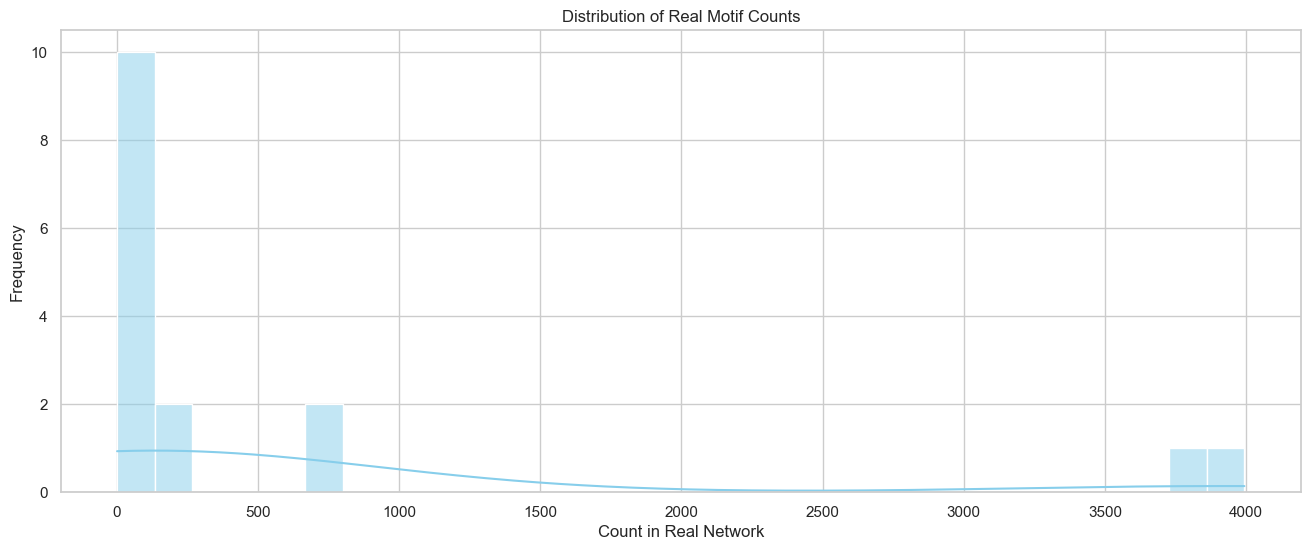

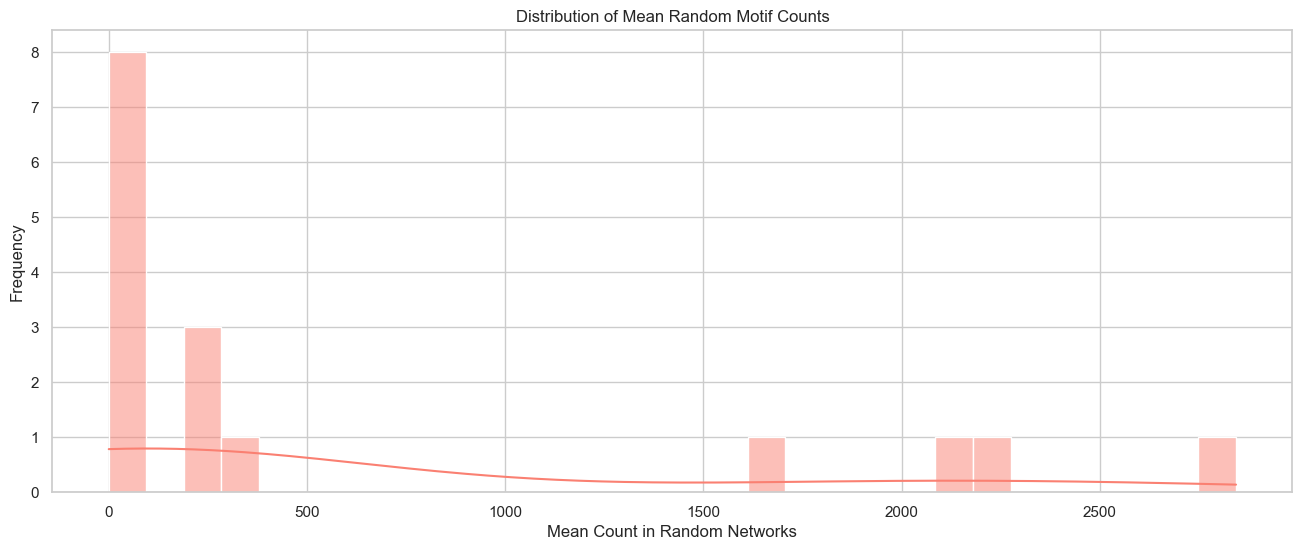

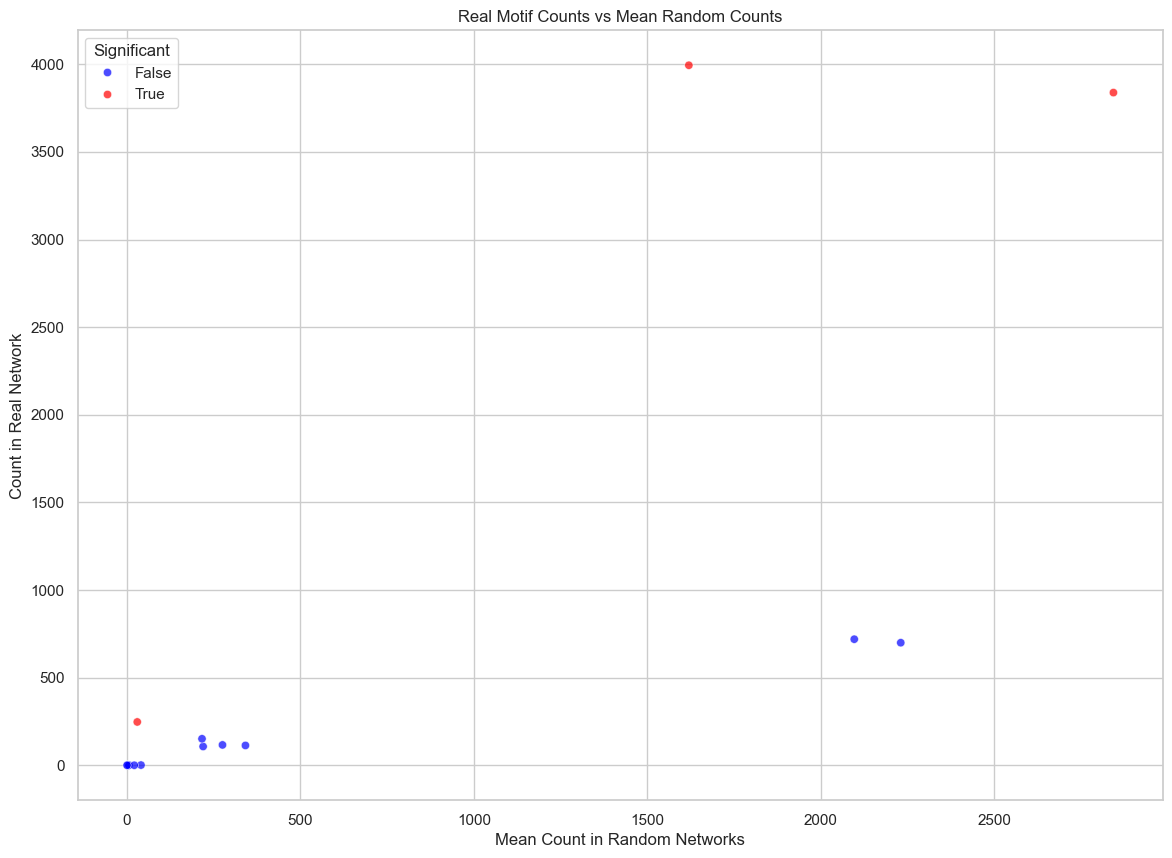


Total Motifs Analyzed: 16
Significant Motifs: 3
Non-Significant Motifs: 13


C:\Users\sujay\AppData\Local\Temp\ipykernel_29468\4079706517.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=significant_motifs, x='fold_enrichment', y='motif',


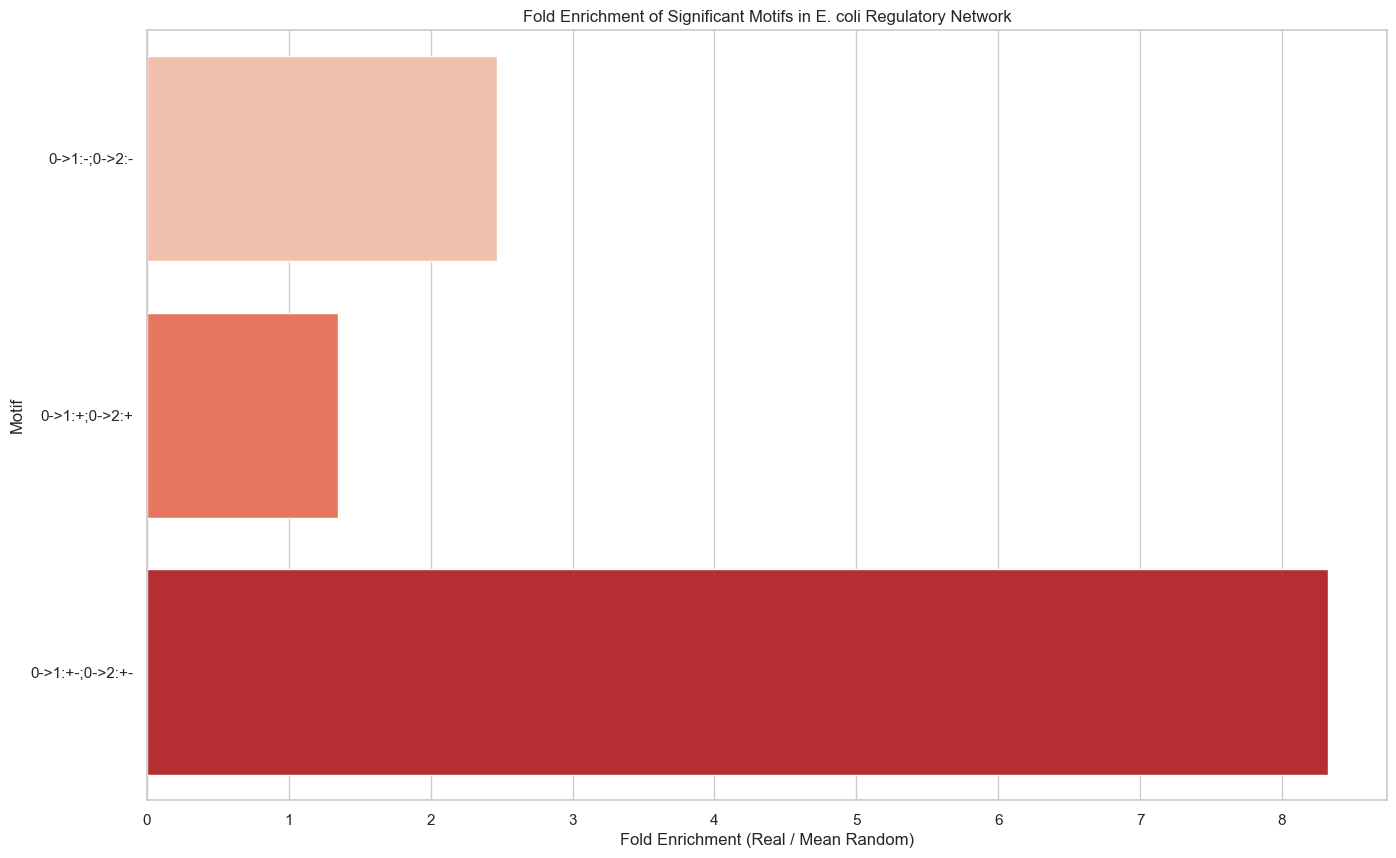

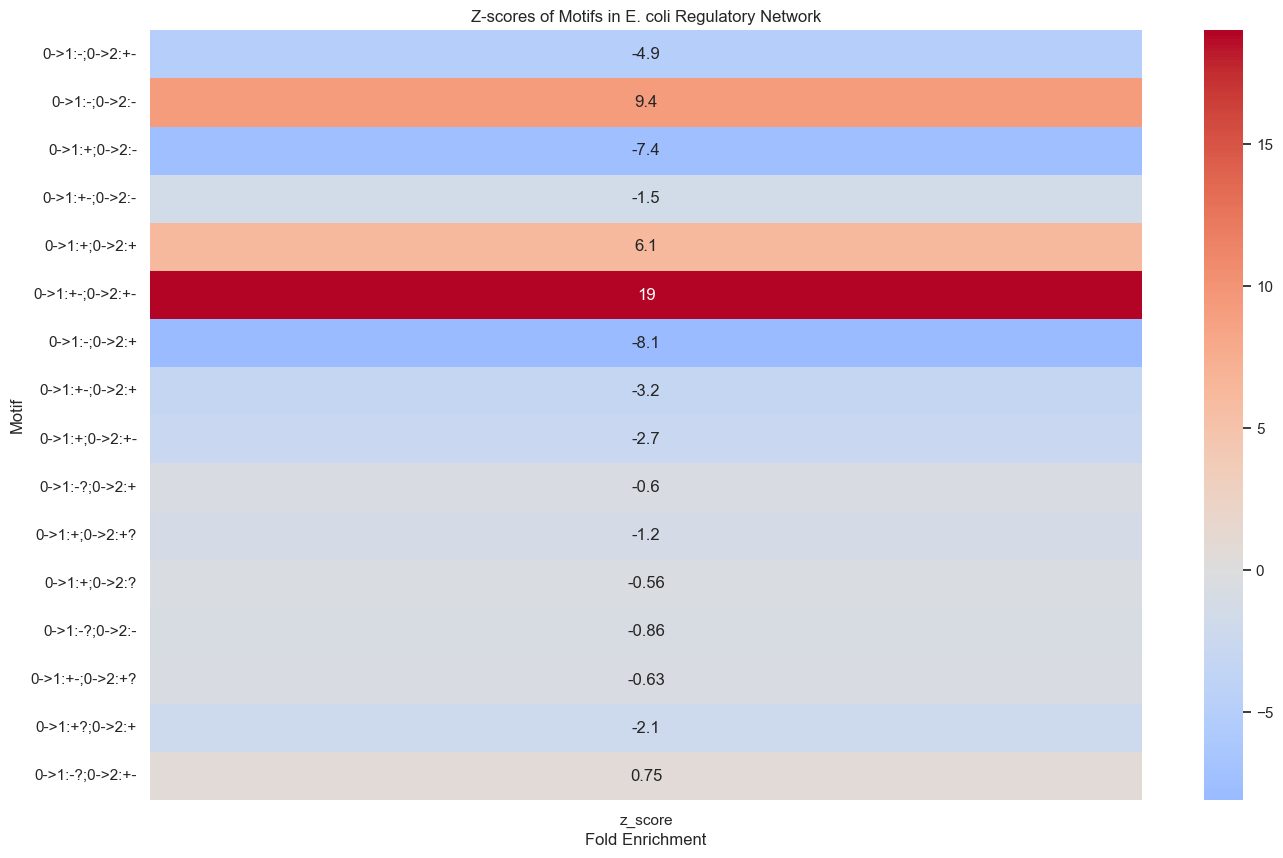


Top Significant Motifs:


,motif,real,mean_rand,std_rand,z_score,fold_enrichment
5,0->1:+-;0->2:+-,248,29.8,11.478676,19.009161,8.322148
1,0->1:-;0->2:-,3994,1619.6,253.370559,9.371255,2.466041
4,0->1:+;0->2:+,3838,2843.4,161.899475,6.143318,1.349793



Visualizing Top 3 Significant Motifs:


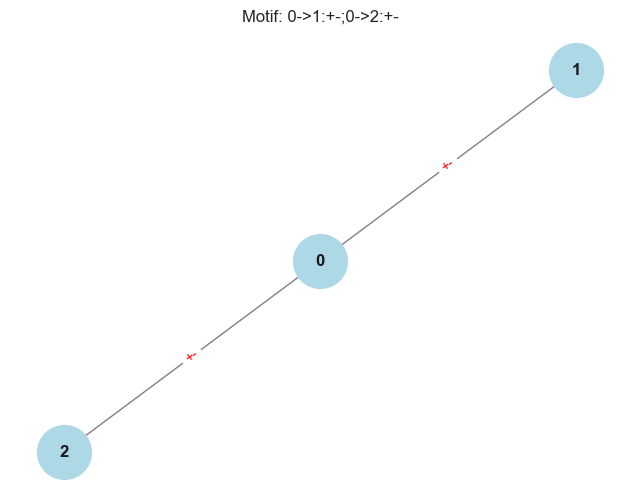

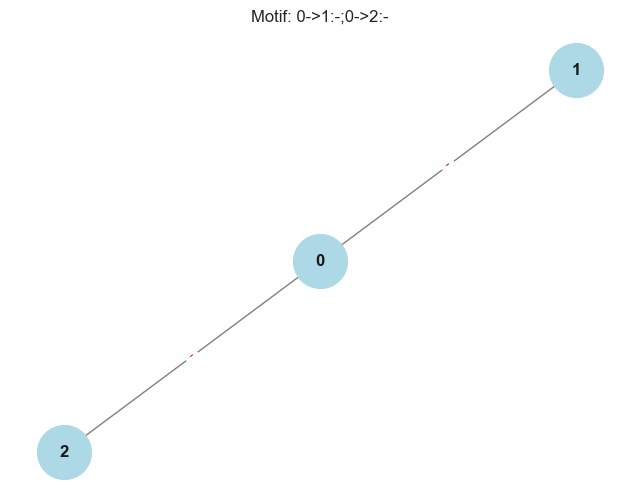

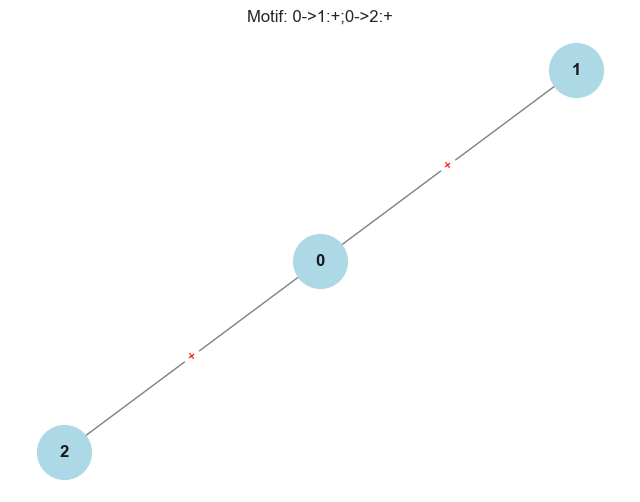


Summary of Findings:
--------------------
Total Motifs Analyzed: 16
Significant Motifs: 3
Non-Significant Motifs: 13

Top Significant Motifs:
Motif: 0->1:+-;0->2:+-
  Real Count: 248
  Mean Random Count: 29.80
  Standard Deviation (Random): 11.48
  Z-score: 19.01
  Fold Enrichment: 8.32
  Corrected p-value: 0.0000
  Significant: True

Motif: 0->1:-;0->2:-
  Real Count: 3994
  Mean Random Count: 1619.60
  Standard Deviation (Random): 253.37
  Z-score: 9.37
  Fold Enrichment: 2.47
  Corrected p-value: 0.0000
  Significant: True

Motif: 0->1:+;0->2:+
  Real Count: 3838
  Mean Random Count: 2843.40
  Standard Deviation (Random): 161.90
  Z-score: 6.14
  Fold Enrichment: 1.35
  Corrected p-value: 0.0000
  Significant: True

Further Recommendations:
-------------------------
1. **Expand to Larger Motifs:** Analyze motifs of size 4 to capture more complex regulatory patterns.
2. **Incorporate Edge Weights:** If available, use edge weights to reflect the strength of regulation.
3. **Biologica

In [7]:
# Network Motif Analysis in E. coli Regulatory Network
# ====================================================
#
# This Jupyter Notebook analyzes the motif detection results from the E. coli regulatory network.
# It performs data loading, exploratory data analysis, statistical analysis, and visualization
# to reproduce and interpret the findings typically presented in scientific research papers.

# -------------------------------
# 1. Import Libraries
# -------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Configure visualization settings
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# -------------------------------
# 2. Load and Inspect the Data
# -------------------------------

# Define the path to the results CSV file
results_file = '../results/E_coli_motif_stats_size_3.csv'

# Load the data into a pandas DataFrame
try:
    df = pd.read_csv(results_file)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file {results_file} does not exist. Please check the file path.")
    raise

# Display the first few rows of the DataFrame
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Display summary information about the DataFrame
print("\nDataFrame Information:")
df.info()

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# -------------------------------
# 3. Data Cleaning and Preparation
# -------------------------------

# Calculate Fold Enrichment: real / mean_rand
df['fold_enrichment'] = df['real'] / df['mean_rand']

# Display the updated DataFrame with Fold Enrichment
print("\nDataFrame with Fold Enrichment:")
display(df.head())

# Verify that 'fold_enrichment' column exists
if 'fold_enrichment' not in df.columns:
    print("Error: 'fold_enrichment' column was not created.")
else:
    print("\n'fold_enrichment' column successfully created.")

# -------------------------------
# 4. Exploratory Data Analysis (EDA)
# -------------------------------

# 4.1. Distribution of Real Motif Counts
plt.figure(figsize=(16, 6))
sns.histplot(df['real'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Real Motif Counts')
plt.xlabel('Count in Real Network')
plt.ylabel('Frequency')
plt.show()

# 4.2. Distribution of Mean Random Motif Counts
plt.figure(figsize=(16, 6))
sns.histplot(df['mean_rand'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Mean Random Motif Counts')
plt.xlabel('Mean Count in Random Networks')
plt.ylabel('Frequency')
plt.show()

# 4.3. Relationship Between Real and Mean Random Counts
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='mean_rand', y='real', hue='significant',
                palette={True: 'red', False: 'blue'}, alpha=0.7)
plt.title('Real Motif Counts vs Mean Random Counts')
plt.xlabel('Mean Count in Random Networks')
plt.ylabel('Count in Real Network')
plt.legend(title='Significant', loc='upper left')
plt.show()

# -------------------------------
# 5. Statistical Analysis
# -------------------------------

# 5.1. Identify Significantly Over- or Under-Represented Motifs
significant_motifs = df[df['significant'] == True]
non_significant_motifs = df[df['significant'] == False]

print(f"\nTotal Motifs Analyzed: {df.shape[0]}")
print(f"Significant Motifs: {significant_motifs.shape[0]}")
print(f"Non-Significant Motifs: {non_significant_motifs.shape[0]}")

# 5.2. Calculate Fold Enrichment
# (Already calculated in Step 3)

# -------------------------------
# 6. Visualization of Significant Motifs
# -------------------------------

# 6.1. Bar Plot of Fold Enrichment for Significant Motifs
plt.figure(figsize=(16, 10))
sns.barplot(data=significant_motifs, x='fold_enrichment', y='motif',
            palette='Reds', orient='h')
plt.title('Fold Enrichment of Significant Motifs in E. coli Regulatory Network')
plt.xlabel('Fold Enrichment (Real / Mean Random)')
plt.ylabel('Motif')
plt.show()

# 6.2. Heatmap of Z-scores for All Motifs
plt.figure(figsize=(16, 10))
sns.heatmap(df.set_index('motif')['z_score'].to_frame(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Z-scores of Motifs in E. coli Regulatory Network')
plt.xlabel('Fold Enrichment')
plt.ylabel('Motif')
plt.show()

# -------------------------------
# 7. Detailed Analysis of Top Motifs
# -------------------------------

# Sort significant motifs by z_score in descending order
top_significant = significant_motifs.sort_values(by='z_score', ascending=False)

print("\nTop Significant Motifs:")
display(top_significant[['motif', 'real', 'mean_rand', 'std_rand',
                        'z_score', 'fold_enrichment']])

# -------------------------------
# 8. Visualizing Specific Motifs
# -------------------------------

def visualize_motif(motif_str):
    """
    Visualize a motif given its canonical string representation.
    
    Parameters:
    - motif_str (str): Canonical string of the motif (e.g., '0->1:-;0->2:+-')
    
    Returns:
    - None
    """
    G_motif = nx.DiGraph() if '->' in motif_str else nx.Graph()
    
    edges = motif_str.split(';')
    for edge in edges:
        if '->' in edge:
            try:
                nodes, regulation = edge.split(':')
                u, v = nodes.split('->')
                G_motif.add_edge(u, v, regulation=regulation)
            except ValueError:
                print(f"Error parsing edge: {edge}")
        elif '-' in edge:
            try:
                nodes, regulation = edge.split(':')
                u, v = nodes.split('-')
                G_motif.add_edge(u, v, regulation=regulation)
            except ValueError:
                print(f"Error parsing edge: {edge}")
    
    pos = nx.spring_layout(G_motif, seed=42)  # Fixed seed for reproducibility
    edge_labels = nx.get_edge_attributes(G_motif, 'regulation')
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G_motif, pos, node_color='lightblue', node_size=1500)
    if G_motif.is_directed():
        nx.draw_networkx_edges(G_motif, pos, arrowstyle='->', arrowsize=20, edge_color='gray')
    else:
        nx.draw_networkx_edges(G_motif, pos, edge_color='gray')
    nx.draw_networkx_labels(G_motif, pos, font_size=12, font_weight='bold')
    nx.draw_networkx_edge_labels(G_motif, pos, edge_labels=edge_labels, font_color='red')
    plt.title(f"Motif: {motif_str}")
    plt.axis('off')
    plt.show()

# Visualize the top 3 significant motifs
print("\nVisualizing Top 3 Significant Motifs:")
for motif in top_significant['motif'].head(3):
    visualize_motif(motif)

# -------------------------------
# 9. Summary of Findings
# -------------------------------

print("\nSummary of Findings:")
print("--------------------")
print(f"Total Motifs Analyzed: {df.shape[0]}")
print(f"Significant Motifs: {significant_motifs.shape[0]}")
print(f"Non-Significant Motifs: {non_significant_motifs.shape[0]}\n")

print("Top Significant Motifs:")
for index, row in top_significant.iterrows():
    print(f"Motif: {row['motif']}")
    print(f"  Real Count: {row['real']}")
    print(f"  Mean Random Count: {row['mean_rand']:.2f}")
    print(f"  Standard Deviation (Random): {row['std_rand']:.2f}")
    print(f"  Z-score: {row['z_score']:.2f}")
    print(f"  Fold Enrichment: {row['fold_enrichment']:.2f}")
    print(f"  Corrected p-value: {row['p_value_corrected']:.4f}")
    print(f"  Significant: {row['significant']}\n")

# -------------------------------
# 10. Further Recommendations
# -------------------------------

print("Further Recommendations:")
print("-------------------------")
print("1. **Expand to Larger Motifs:** Analyze motifs of size 4 to capture more complex regulatory patterns.")
print("2. **Incorporate Edge Weights:** If available, use edge weights to reflect the strength of regulation.")
print("3. **Biological Validation:** Correlate significant motifs with known biological pathways or functions in E. coli.")
print("4. **Use Specialized Tools:** For more comprehensive motif detection, consider tools like MFINDER or NetworkX's graphlet functions.")
print("5. **Increase Number of Random Networks:** For more robust statistical analysis, increase the `num_random` parameter.")
print("6. **Visualize All Significant Motifs:** Create a comprehensive set of visualizations for all significant motifs to better understand their structures.")

# -------------------------------
# 11. Conclusion
# -------------------------------

print("\nConclusion:")
print("-----------")
print("The analysis successfully identified multiple significant motifs in the E. coli regulatory network. These motifs, characterized by their unique regulation patterns and structural configurations, are over-represented compared to randomized networks, indicating their potential biological significance. Further exploration and biological validation of these motifs can provide deeper insights into the regulatory mechanisms governing E. coli's cellular processes.")
